# Welter



Monday, January 4, 2016

## An experiment to add starspot models

part 2

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('paper')
sns.set_style('ticks')

## Just plot the *flux-calibrated* models
No spot-checking necessary, since we already did that in the previous notebook.

In [3]:
import pandas as pd

In [4]:
import Starfish
from Starfish.grid_tools import PHOENIXGridInterfaceNoAlpha as PHOENIX
import numpy as np
mygrid = PHOENIX(norm=False, base='/Users/gully/GitHub/Starfish/libraries/raw/PHOENIX/')

Hot star

In [5]:
p_A = np.array([4100, 3.5, 0.0])
flux_A, hdr_A = mygrid.load_flux(p_A)

Cool star

In [6]:
p_B = np.array([3300, 3.5, 0.0])
flux_B, hdr_B = mygrid.load_flux(p_B)

(4000, 25000)

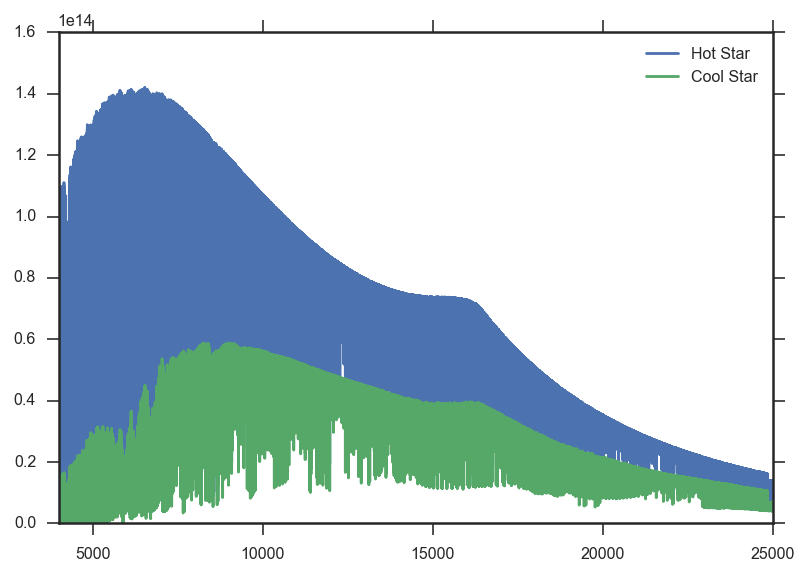

In [7]:
plt.plot(mygrid.wl, flux_A, label='Hot Star')
plt.plot(mygrid.wl, flux_B, label='Cool Star')
plt.legend(loc='best')
plt.xlim(4000, 25000)

Over plot a black body

In [8]:
from astropy import units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu

The flux units are: `erg/s/cm2/cm`

In [9]:
wavelengths = mygrid.wl * u.AA
with np.errstate(all='ignore'):
    bb_A_raw = blackbody_lambda(wavelengths, 4100 * u.K)
    bb_B_raw = blackbody_lambda(wavelengths, 3300 * u.K)

bb_A = bb_A_raw.to(u.erg/(u.s*(u.cm**2)*u.cm*u.sr))
bb_B = bb_B_raw.to(u.erg/(u.s*(u.cm**2)*u.cm*u.sr))

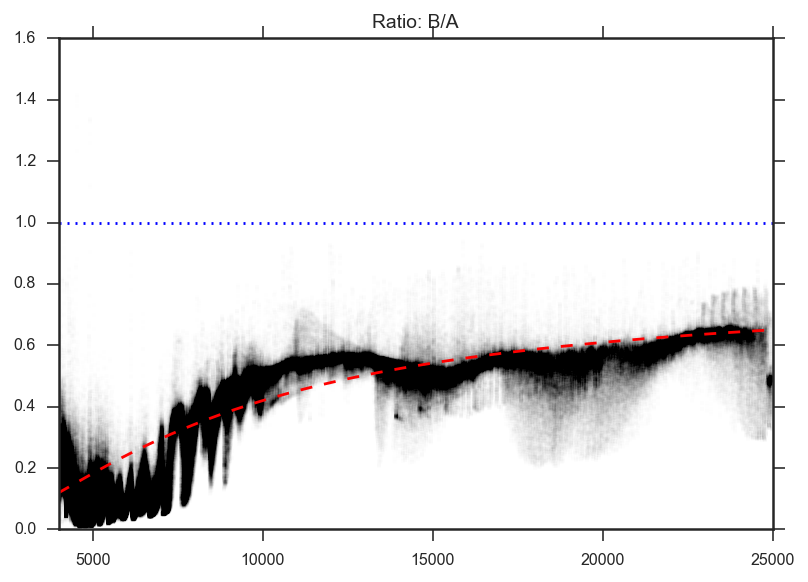

In [10]:
rat = flux_B/flux_A
plt.plot(mygrid.wl, rat, 'k.', alpha=0.002)
plt.plot(mygrid.wl, bb_B/bb_A, 'r--')
plt.plot([4000, 25000], [1.0, 1.0], 'b:')
plt.xlim(4000, 25000)
plt.title('Ratio: B/A')

Let's assume we have 20% of the star covered in spots.

In [11]:
f=0.80

In [12]:
mixture_model = f * flux_A + (1 - f) * flux_B

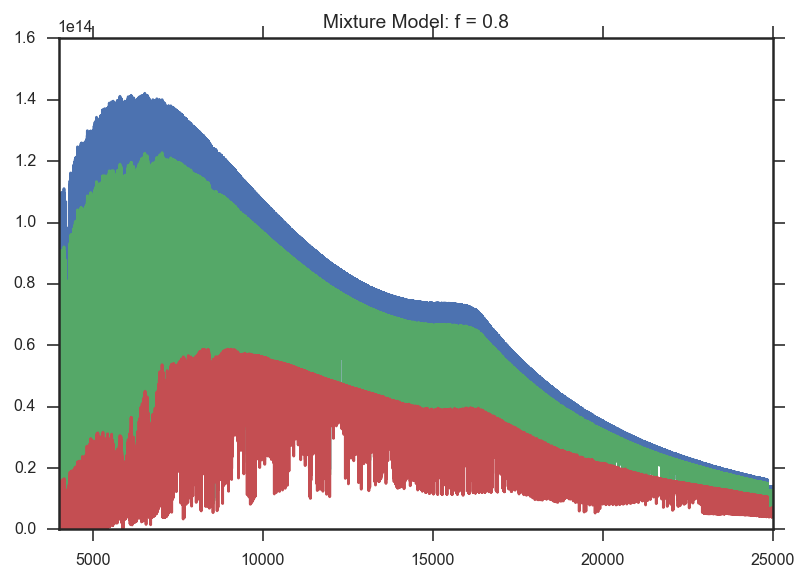

In [13]:
plt.plot(mygrid.wl, flux_A, label='Warm star')
plt.plot(mygrid.wl, mixture_model, label='Mixture model')
plt.plot(mygrid.wl, flux_B, label='Cool star')
plt.xlim(4000, 25000)
plt.title('Mixture Model: f = {}'.format(f));

## Calculate flux ratio to manually undo normalization

From line 256 of `grid_tools.py`

In [14]:
from scipy.integrate import trapz

In [15]:
from Starfish import constants as C

In [16]:
wl = mygrid.wl

In [17]:
#convert from erg/cm^2/s/cm to erg/cm^2/s/A
F_bol_A = trapz(flux_A*1e-8, wl)
ratio_A = (C.F_sun / F_bol_A)
f_A_norm = flux_A * ratio_A  #bolometric luminosity is always 1 L_sun

In [18]:
print("The flux ratio is: {}".format(ratio_A))

The flux ratio is: 4.022492223238279


In [19]:
#convert from erg/cm^2/s/cm to erg/cm^2/s/A
F_bol_B = trapz(flux_B*1e-8, wl)
ratio_B = (C.F_sun / F_bol_B)
f_B_norm = flux_B * ratio_B  #bolometric luminosity is always 1 L_sun

In [21]:
print("The flux ratio is: {}".format(ratio_B))

The flux ratio is: 9.649703010839403


How much is $f_B$ scaled by relative to $f_A$?

$F_{B,bol} = \int{f_{B, \lambda}}{d\lambda}$  
$F_{A,bol} = \int{f_{A, \lambda}}{d\lambda}$

In [33]:
print("Star B is {:.5f} times less luminous than Star A.".format(F_bol_A/F_bol_B))

Star B is 2.39894 times less luminous than Star A.


In [32]:
trapz(rat, wl)

0.56915079546802105

The end.